<a href="https://colab.research.google.com/github/JavZon/Deep-Learning/blob/main/DL1_tanishuv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning**

In [15]:
import torch
torch.cuda.is_available()

True

In [14]:
torch.__version__

'2.5.0+cu121'

In [13]:
import fastai
fastai.__version__

'2.7.18'

**Library**

In [20]:
from fastai.vision.all import *
from ipywidgets import widgets
from fastai.data.external import untar_data # Import untar_data

# data
path=untar_data(URLs.PETS)/'images'

# function
def is_cat(f):
    return f[0].isupper()

# dataloaders
dls=ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

# train
learn=cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 119MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.174683,0.023800,0.007442,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.071757,0.039788,0.008796,00:49
1,0.030142,0.013727,0.006089,00:48


In [32]:
# widget
uploader=widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is prediction correct ? True
Probability : 0.9714


<Axes: >

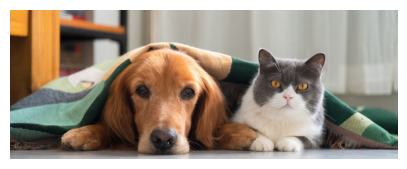

In [33]:
img=PILImage.create(uploader.data[-1])

pred,pred_idx,probs=learn.predict(img)

print(f'Is prediction correct ? {pred}')
print(f'Probability : {probs[pred_idx]:.04f}')
img.show()